In [1]:
import numpy as np


In [2]:
#block A
resources = np.array([
    [100, 150],
    [200, 250],
    [300, 350]
])

factors = np.array([
    [1.1, 0.9],
    [0.8, 1.2]
])

result = np.dot(resources, factors)

print("Result matrix:")
print(result)


Result matrix:
[[230. 270.]
 [420. 480.]
 [610. 690.]]


In [3]:
shift_A = np.array([
    [10, 12, 11, 13, 15, 14, 16],
    [20, 22, 21, 23, 25, 24, 26],
    [30, 32, 31, 33, 35, 34, 36]
])

shift_B = np.array([
    [5, 6, 5, 6, 7, 6, 7],
    [10, 11, 10, 11, 12, 11, 12],
    [15, 16, 15, 16, 17, 16, 17]
])

total = shift_A + shift_B

print("Total production:")
print(total)


Total production:
[[15 18 16 19 22 20 23]
 [30 33 31 34 37 35 38]
 [45 48 46 49 52 50 53]]


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

values = np.array([-2, -1, 0, 1, 2])

print("Sigmoid values:")
print(sigmoid(values))


Sigmoid values:
[0.11920292 0.26894142 0.5        0.73105858 0.88079708]


In [5]:
def sigmoid_gradient(x):
    s = sigmoid(x)
    return s * (1 - s)

print("Sigmoid gradient:")
print(sigmoid_gradient(values))


Sigmoid gradient:
[0.10499359 0.19661193 0.25       0.19661193 0.10499359]


[[0.25       0.33333333 1.        ]
 [0.         1.         0.66666667]
 [0.75       0.         0.33333333]
 [0.5        0.66666667 0.        ]
 [1.         0.         0.66666667]]
[[0.        ]
 [0.16666667]
 [0.33333333]
 [0.58333333]
 [1.        ]]
W1 (3x3):
 [[ 0.04967142 -0.01382643  0.06476885]
 [ 0.15230299 -0.02341534 -0.0234137 ]
 [ 0.15792128  0.07674347 -0.04694744]]
b1 (1x3):
 [[0. 0. 0.]]
W2 (3x1):
 [[ 0.054256  ]
 [-0.04634177]
 [-0.04657298]]
b2 (1x1):
 [[0.]]
Final trained weights and biases
W1 (3x3):
 [[-1.26875391 -1.59361725 -0.56802297]
 [-0.26675308 -0.51525873 -1.88826767]
 [ 1.65308263  1.98601082 -2.57401806]]
b1 (1x3):
 [[0.16566907 0.26964096 2.28427467]]
W2 (3x1):
 [[-2.07935844]
 [-2.5914109 ]
 [-3.94524563]]
b2 (1x1):
 [[3.25843622]]

Predictions for all 5 data points
Sample 1: y_true = 18.00 ($k), y_pred = 18.21 ($k)
Sample 2: y_true = 20.00 ($k), y_pred = 19.99 ($k)
Sample 3: y_true = 22.00 ($k), y_pred = 22.01 ($k)
Sample 4: y_true = 25.00 ($k), y_pred =

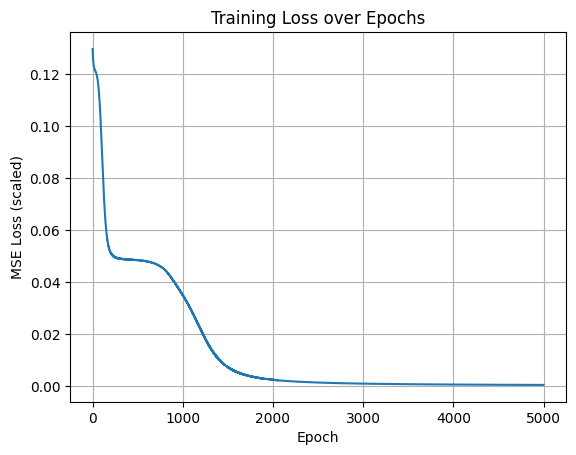

In [6]:
# block C
np.random.seed(42)

X_raw = np.array([
    [20, 3, 4],
    [15, 5, 3],
    [30, 2, 2],
    [25, 4, 1],
    [35, 2, 3]
], dtype=float)

y_raw = np.array([
    [18],
    [20],
    [22],
    [25],
    [30]
], dtype=float)

# 2) Normalization

def minmax_fit(a):
    a_min = a.min(axis=0, keepdims=True)
    a_max = a.max(axis=0, keepdims=True)
    return a_min, a_max

def minmax_transform(a, a_min, a_max):
    return (a - a_min) / (a_max - a_min + 1e-12)

def minmax_inverse(a_scaled, a_min, a_max):
    return a_scaled * (a_max - a_min + 1e-12) + a_min

X_min, X_max = minmax_fit(X_raw)
y_min, y_max = minmax_fit(y_raw)

X = minmax_transform(X_raw, X_min, X_max)          # shape (5, 3)
y = minmax_transform(y_raw, y_min, y_max)          # shape (5, 1)
print(X)
print(y)

# 3) Activations + derivatives

def relu(z):
    return np.maximum(0.0, z)

def relu_grad(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# 4) Initialize parameters
W1 = 0.1 * np.random.randn(3, 3)
b1 = np.zeros((1, 3))
W2 = 0.1 * np.random.randn(3, 1)
b2 = np.zeros((1, 1))

print("W1 (3x3):\n", W1)
print("b1 (1x3):\n", b1)
print("W2 (3x1):\n", W2)
print("b2 (1x1):\n", b2)

# 5) Training settings
lr = 0.5
epochs = 5000
loss_history = []

# 6) Training loop: Forward -> Loss -> Backprop -> Gradient Descent
n = X.shape[0]

for epoch in range(1, epochs + 1):
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    y_hat = sigmoid(Z2)

    loss = np.mean((y_hat - y) ** 2)
    loss_history.append(loss)

    dY = (2.0 / n) * (y_hat - y)

    dZ2 = dY * (y_hat * (1.0 - y_hat))

    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_grad(Z1)

    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    # 7) Final predictions

Z1 = X @ W1 + b1
A1 = relu(Z1)
Z2 = A1 @ W2 + b2
y_hat_scaled = sigmoid(Z2)
y_hat_revenue = minmax_inverse(y_hat_scaled, y_min, y_max)

# 8) Print results required by assignment

print("Final trained weights and biases")
print("W1 (3x3):\n", W1)
print("b1 (1x3):\n", b1)
print("W2 (3x1):\n", W2)
print("b2 (1x1):\n", b2)

print("\nPredictions for all 5 data points")
for i in range(n):
    print(f"Sample {i+1}: y_true = {y_raw[i,0]:.2f} ($k), "
          f"y_pred = {y_hat_revenue[i,0]:.2f} ($k)")

print("\nTraining loss (MSE on scaled y)")
print("First 5:", [float(v) for v in loss_history[:5]])
print("Last  5:", [float(v) for v in loss_history[-5:]])
print("Final loss:", float(loss_history[-1]))

# 9) Simple loss plot
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss (scaled)")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()